## Importing Libraries

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [2]:
url = "datasets/data.csv"
data = pd.read_csv(url)
data = data.drop(columns=['Unnamed: 32'])

## Pre-processing Dataset

In [ ]:
data.head()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(data.isna().sum())

In [ ]:
print("Duplicae Data: ", data.duplicated().sum())

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("Duplicae Data: ", data.duplicated().sum())

In [4]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

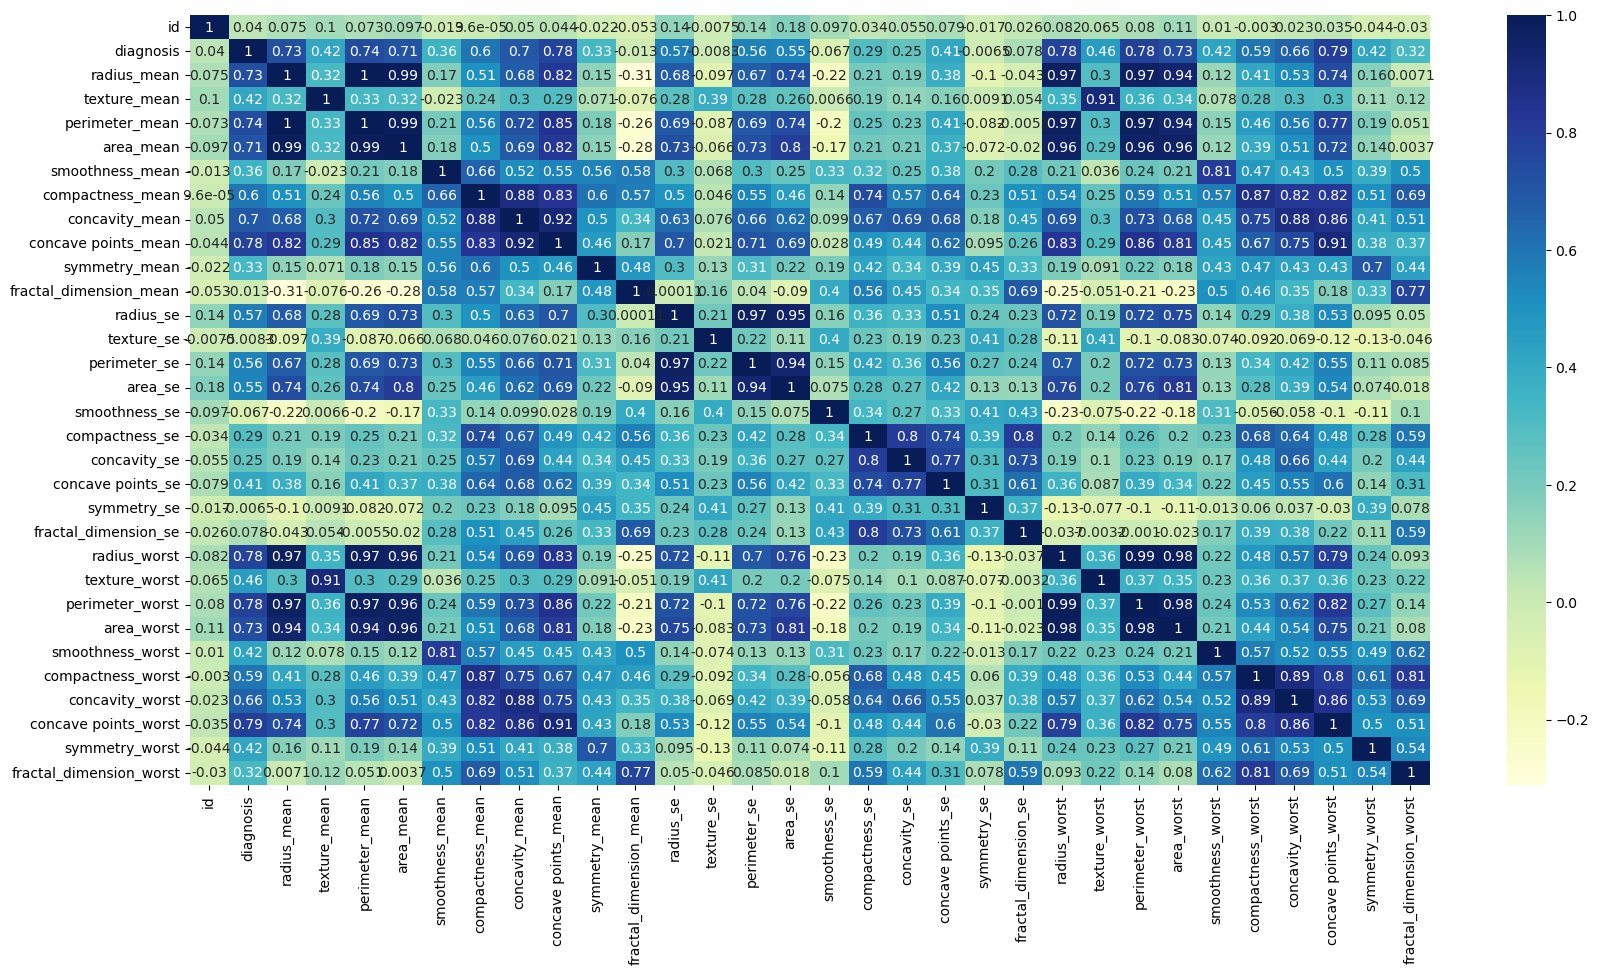

In [36]:
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Splitting The Dataset (Base)

In [6]:
x = data.iloc[:, 2:].values 
y = data['diagnosis'].values 

In [7]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (569, 30)
Data type of x elements: float64
First 5 elements of x:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e

In [8]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (569,)
Data type of y elements: int64
First 5 elements of y:
 [1 1 1 1 1]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [11]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[9.029e+00 1.733e+01 5.879e+01 2.505e+02 1.066e-01 1.413e-01 3.130e-01
  4.375e-02 2.111e-01 8.046e-02 3.274e-01 1.194e+00 1.885e+00 1.767e+01
  9.549e-03 8.606e-02 3.038e-01 3.322e-02 4.197e-02 9.559e-03 1.031e+01
  2.265e+01 6.550e+01 3.247e+02 1.482e-01 4.365e-01 1.252e+00 1.750e-01
  4.228e-01 1.175e-01]]

X_test sample:
[[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
  3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
  6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
  2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
  3.014e-01 8.750e-02]]

y_train sample:
[0]

y_test sample:
[0]


## Train XGBoost Model On Base Dataset

In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Base Model Evaluation (XGBoost)

In [17]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1-score: 0.95


## Scaling The Dataset

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = data.iloc[:, 2:].values
features_scaled = scaler.fit_transform(features)

## PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [5, 10, 15, 20]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
grid_search_pca.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_pca = grid_search_pca.best_params_
print(f'Best PCA parameters: {best_params_pca}')


Best PCA parameters: {'pca__n_components': 15}


In [23]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=15)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (569, 30)
PCA reduced shape: (569, 15)


## Splitting The Dataset (After Feature Reduced With PCA)

In [25]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [26]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (455, 15)
X_pca_test shape: (114, 15)
y_pca_train shape: (455,)
y_pca_test shape: (114,)


In [27]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[ 4.33000265  9.20252569  1.49296283 -0.3199473  -4.72817055  2.21576431
  -2.58106006  1.29915301  3.78411857 -2.73815837  2.30394216 -1.94959514
  -1.10465056  0.24528741  1.06125964]]

X_pca_test sample:
[[-0.78118997  0.65284926 -0.643657   -0.21446824  0.4376799  -0.16048949
   0.18723511 -0.06818966  0.53375804  0.18956175  0.08623605  0.05292868
  -0.07532601  0.01061286 -0.09724003]]

y_pca_train sample:
[0]

y_pca_test sample:
[0]


## Train The Model (After Feature Reduced With PCA) 

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_pca_test, y_pca_pred)
precision = precision_score(y_pca_test, y_pca_pred)
recall = recall_score(y_pca_test, y_pca_pred)
f1 = f1_score(y_pca_test, y_pca_pred)

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1-score: 0.95


## UMAP

In [21]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [5, 10, 15, 20],
    'umap__n_components': [2, 5, 10, 20],
    'umap__min_dist': [0.0, 0.1, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=5)
grid_search_umap.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_umap = grid_search_umap.best_params_
print(f'Best UMAP parameters: {best_params_umap}')

Best UMAP parameters: {'umap__metric': 'manhattan', 'umap__min_dist': 0.1, 'umap__n_components': 10, 'umap__n_neighbors': 10}


In [22]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=10,
    n_components=10,
    min_dist=0.1,
    metric='manhattan'
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (569, 30)
Umap reduced shape: (569, 10)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [30]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [31]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (455, 10)
X_umap_test shape: (114, 10)
y_umap_train shape: (455,)
y_umap_test shape: (114,)


In [32]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[7.5112476 5.865342  5.6078653 8.430848  7.6877317 1.4316912 9.668053
  4.390356  1.8865805 3.7852113]]

X_umap_test sample:
[[6.7392697 6.824728  6.4529047 8.482297  7.1123414 0.9081283 9.756659
  4.5969477 1.6623677 4.7531767]]

y_umap_train sample:
[0]

y_umap_test sample:
[0]


## Train The Model (After Feature Reduced With UMAP) 

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_umap_test, y_umap_pred)
precision = precision_score(y_umap_test, y_umap_pred)
recall = recall_score(y_umap_test, y_umap_pred)
f1 = f1_score(y_umap_test, y_umap_pred)

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1-score: 0.95
